# DSP Lecture Notes 1: Linear Algebra for Signal Processing
$\text{2023 D.J. Lopez | Digital Signals Processing }$

Signals are naturally time-sampled values collected from nature or from any physical entity or observation in the real world. Linear Algebra posits a representation scheme for easy computation, manipulation, and modeling for simple to complex signal processes. In this notebook, we try to understand how linear algebra works as a mathematical tool and a computational tool for analysis. Aside from the mathematical concepts for linearity, vectors, and linear transformation, we will also look at how we could model such mathematics in code. 

An advantage of using software tools for linear algebra or with any applied field of mathematics is that it abstracts the processes or hastens computations so that engineers or scientists can interpret results faster. The use of software-based mathematics could also help develop better intuition in how math works and how it reacts to certain stimuli or as part of a system. In this notebook, we will use Python, specifically the `numpy` library for computation and `matplotlib` for visualization.

The rest of the notebook will be structured as follows:
>1. [Linearity and Vectors](#1.-Linearity-and-Vectors)
>    - [Vectors](#Vectors)
>    - [Matrices](#Matrices)
>2. [Vector Operations](#2.-Vector-Operations)
>    - [Vector Arithmetic](#Vector-Arithmetic)
>    - [Transposition](#Transposition)
>    - [Inner Product](#Inner-Product)
>3. [Vector Norm and Linear Independence](#3.-Vector-Norm-and-Linear-Independence)
>4. [Linear Transformations](#4.-Linear-Transformations)
>5. [Orthogonality and Normality](#5.-Orthogonality-and-Normality)


## 1. Linearity and Vectors

The main assumption in linear algebra is that everything that we are working with lines or that we are dealing with the linear properties of an entity in the world. The bottom line is that, in linear algebra, we assume that the objects we are manipulating have a linear component or can be represented by many lines.

The first concept that you would need to get a grasp of is the linear combination. It just simply tells you that for a line $y$ it can be described by several properties $x$ that are either scaled or flipped. 

$$y = a_0x_0 + a_1x_1 + a_2x_2 + ... + a_{n-1}x_{n-1}+ a_nx_n$$ 
$$_{(\text{Eq. 1.1})}$$

One of the most famous linear combinations is the point-slope formula from elementary Geometry

$$y = mx + b$$
$$_{(\text{Eq. 1.2})}$$

Where the slope $m$ is a scalar of some value $x$ while the y-intercept $b$ is the scalar of $x=0$ (the origin).

The idea of doing linear algebra in code is part of computational programming. We take advantage of the logic and arithmetic of linear algebra and code them to apply the theory. We can immediately see the transformation of data and how they are represented.

In this discussion we will be using `numpy` as the main library for computation and `matplotlib` for visualizing the data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(200) ## we set seed numbers to make sure that randomly generated numbers will be the same for everyone.

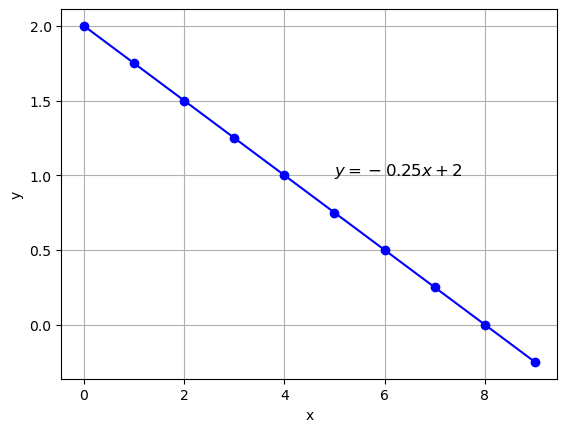

In [8]:
# set sum values of x
X = [0,1,2,3,4,5,6,7,8,9]

## set the slope and intercept
m, b = -0.25, 2

## determine Y using linear combinations of m and b
y = []
for x in X:
    y.append(m*x + b)

plt.plot(X,y, 'bo-')
plt.text(
    int(len(X)/2),int(b/2), ## x and y coordinates of the text
    fr'$y={m}x+{b}$', fontsize=12)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### Vectors

If the linear combination of a $y$ would have too many $x$ values it would be a drag to write them in a long line. A more convenient representation of the linear combination is to represent them as a group of numbers. We now consider the concept of inner products where it is simply the sum of products of scalars and $x$.

We first group the scalars and $x$'s by parentheses like so:

$$\hat{a} = \begin{pmatrix} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_{n-1} \\ a_n \end{pmatrix}, \hat{x} = \begin{pmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_{n-1} \\ x_n \end{pmatrix}$$
$$_{(\text{Eq. 1.3})}$$

We now call $\hat{a}$ a vector containing scalars $\hat{a}$ and $\hat{x}$ containing $a$'s and $x$'s respectively. We then get the inner product between $\hat{a}$ and $\hat{x}$ to produce some vector $y$:

$$y = \hat{a} \cdot \hat{x} = \begin{pmatrix} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_{n-1} \\ a_n \end{pmatrix} \cdot \begin{pmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_{n-1} \\ x_n \end{pmatrix} = a_0x_0 + a_1x_1 + a_2x_2 + ... + a_{n-1}x_{n-1} + a_n$$
$$_{(\text{Eq. 1.4})}$$

Vectors are the most fundamental concept in linear algebra. Vectors in the computer science aspect are the collection of **scalars** or numbers; or in the mathematical perspective, these are representations of a point in space. We can mathematically represent vectors as:

$$\mathbf{v} = \begin{pmatrix} a_0 & a_1 & a_2 & ... & a_{n-1} & a_n \end{pmatrix}$$
$$_{(\text{Eq. 1.5})}$$

In [3]:
## Creating a Scalar
scalar = 1
## in numpy
scalar_np = np.array(5)

print(scalar)
print(scalar_np)

1
5


In [4]:
## Creating a vector in numpy
vector = np.array([1,2,3,5,6,7])

print(vector)

[1 2 3 5 6 7]


There are mainly two ways to visualize vectors. The first way is to consider them as line segments, the second is as basis for a continuous line. Let us try to visualize these two ways. For the line segment visualization, this is the usual representation in Physics and engineering for vector analysis. Similar concepts of **vector resultants** are easier to understand in this kind of visualization.

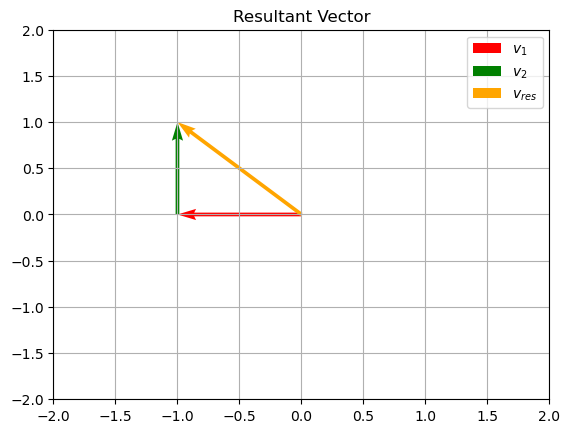

In [21]:
v_1 = np.array([-1,0]) ## first vector
v_2 = np.array([0,1]) ## second vector

plt.title("Resultant Vector")

## the quiver plot plots an arrow corresponding to the coordinates
plt.quiver(
    0,0, 
    v_1[0], v_1[1], 
    angles='xy', scale_units='xy',scale=1, 
    color='red', label=r'$v_1$')
## the first quiver's base is at the origin (0,0) and the tip is at the value of the vector (-1,0)

plt.quiver(
    v_1[0], v_1[1], 
    v_2[0], v_2[1],
    angles='xy', scale_units='xy',scale=1, 
    color='green', label=r'$v_2$')
## the second quiver's base is at the tip of the first vector and the tip is at the value of the second vector plus the first (-1,-1)

v_res = v_1+v_2 ## create a resultant vector

plt.quiver(
    0, 0, 
    v_res[0], v_res[1],
    angles='xy', scale_units='xy',scale=1,
    color='orange', label=r'$v_{res}$')
## the plot of the resultant vector should point to the tip of the second vector.

plt.xlim(-2, 2) ## set the limits of the x-axis
plt.ylim(-2, 2) ## set the limits of the y-axis

plt.legend()
plt.grid() ## show the grid
plt.show()

The other way to visualize vectors is to consider **spans**. The span of a vector can be thought of as a line passing through the values of the vector. The span of a vector is considered to be the set of all possible linear combinations of a vector. This can be best represented as:
$$\text{Span}({v}) = c\cdot \hat{v}$$
Whereas $c$ is a scalar multiplied to the vector $\hat{v}$ such that $c \in \mathbf{R}$. 

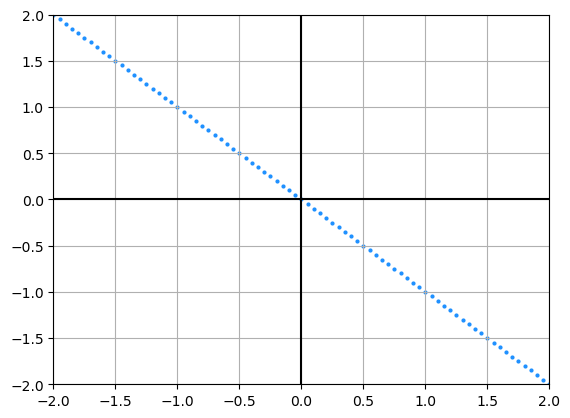

In [33]:
c = np.arange(-10,10,0.05) ## set of scalars defining the span

plt.scatter(c*v_res[0],c*v_res[1], s=4, color='dodgerblue')

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

### Matrices
Matrices are collections of scalars that could be represented in a lattice-like arrangement with $m$ rows and $n$ columns. It takes on a form like this:
$$\mathbf{M} = \begin{pmatrix} a_{00} & a_{01} & a_{02} & ...  & a_{0n} \\ a_{10} & a_{11} & a_{12} & ... & a_{1n} \\ a_{20} & a_{21} & a_{22} & ... & a_{2n} \\ \vdots & \vdots & \vdots & \ddots & \vdots\\ a_{m0} & a_{m1} & a_{m2} & ... & a_{mn} \end{pmatrix} $$
$$_{(\text{Eq. 1.6})}$$


In [5]:
## Creating a Matrix (elements)
A = np.array([
    [1,2,3],
    [3,1,0],
    [-1,0,2]
])
A

array([[ 1,  2,  3],
       [ 3,  1,  0],
       [-1,  0,  2]])

You can also think that matrices are collections of scaled vectors like this:
$$\mathbf{M} = \begin{pmatrix} a_0 \cdot v_0 \\ a_1 \cdot v_1 \\ \vdots \\ a_n\cdot v_n \end{pmatrix}$$
$$_{(\text{Eq. 1.7})}$$

In [6]:
## Creating a Matrix (vectors)
v1 = np.array([1,2,3])
v2 = np.array([3,2,1])
v3 = np.array([1,-1,-2])
B = np.array([
    2*v1,
    -1*v2,
    0.5*v3
])
B

array([[ 2. ,  4. ,  6. ],
       [-3. , -2. , -1. ],
       [ 0.5, -0.5, -1. ]])

## 2. Vector Operations

Operations on vectors increases the efficiency of computing group of numbers, thus improving signal operations. Vector oprations include arithmetic operations, transposition, and the inner product.

### Vector Arithmetic

Vector arithmetic is the most fundamental operation in vector algebra. The operation for arithmetic is done element-wise thus the assumption for such operations is that the vecotrs are of equal shape. The element-wise and scalar arithmetic can be done in Python such as addition, subtraction, multiplication, division, exponentiation, and even other transcendental transformations.

In [34]:
### Element-wise operations
A = np.array([
    [1,2],
    [-1,0]
])
B = np.array([
    [0,1],
    [1,0]
])

In [41]:
## Addition / Subtraction
print(f'A+B: \n{A+B}\n')
print(f'A-B: \n{A-B}\n')

A+B: 
[[5. 6.]
 [6. 5.]]

A-B: 
[[5. 4.]
 [4. 5.]]



In [43]:
## Multiplication / Division
print(f'A x B: \n{A*B}\n')
print(f'A ./ B: \n{A/B}\n') ## take note this is element-wise division

A x B: 
[[0. 5.]
 [5. 0.]]

A ./ B: 
[[inf  5.]
 [ 5. inf]]



C:\Users\Admin\AppData\Local\Temp\ipykernel_17736\26389042.py:3: RuntimeWarning: divide by zero encountered in divide
  print(f'A ./ B: \n{A/B}\n') ## take note this is element-wise division


In [35]:
### Scalar operations
k = -1
A = np.array([
    [1,-1],
    [2,3]
])
k-A ## Broadcasting

array([[-2,  0],
       [-3, -4]])

In [36]:
### Element-wise vector transformations
f = lambda x: np.exp(x)
g = lambda x: np.log(x)
A = 5*np.ones((2,2))
g(A)

array([[1.60943791, 1.60943791],
       [1.60943791, 1.60943791]])

### Transposition
The transposition operation flips the matrix along its diagonal. In mathematical terms it will for some matrix $\mathbf{M}$ its tranposed form will be $\mathbf{M}^T$:
$$\mathbf{M} = \begin{pmatrix} a_{00} & a_{01} & a_{02} \\ a_{10} & a_{11} & a_{12} \\ a_{20} & a_{21} & a_{22}\end{pmatrix} ; \mathbf{M}^T = \begin{pmatrix} a_{00} & a_{10} & a_{20} \\ a_{01} & a_{11} & a_{21} \\ a_{02} & a_{12} & a_{22}\end{pmatrix}$$

$$_{(\text{Eq. 1.8})}$$

In [45]:
## Transposing a square matrix
M = np.random.randint(1,5,(3,3))
print(f'Original matrix: \n{M}\n')
print(f'Transposed matrix: \n{M.T}\n')

Original matrix: 
[[3 4 2]
 [2 4 3]
 [3 1 2]]

Transposed matrix: 
[[3 2 3]
 [4 4 1]
 [2 3 2]]



In [46]:
## Transposing non-square matrices
N = np.random.randint(2,6,(4,3))
print(f'Original matrix: \n{N}\n')
print(f'Transposed matrix: \n{N.T}\n')

Original matrix: 
[[5 5 5]
 [3 5 3]
 [4 5 3]
 [2 5 4]]

Transposed matrix: 
[[5 3 4 2]
 [5 5 5 5]
 [5 3 3 4]]



In [47]:
## Transposing row/column vectors
v = np.random.randint(2,6,(3,1))
print(f'Original vector: \n{v}\n')
print(f'Transposed vector: \n{v.T}\n')

Original vector: 
[[4]
 [3]
 [2]]

Transposed vector: 
[[4 3 2]]



### Inner Product
The inner product is one of the most important operations in linear algebra. It solves for the linear combination of the vectors and matrices. The inner product is not always commutative. 

The inner product of a matrix can be solved only if the number of columin of the first vector is equal to the number of rows in the second vector. So if the first matrix is $\mathbf{A}$ has a shape of $(m,n)$ and the second matrix is $\mathbf{B}$ has a shape of $(i,j)$, then you can perform $AB$ if $n=i$.

## 3. Vector Norm and Linear Independence

## 4. Linear Transformations

## 5. Orthogonality and Normality